In this project we would be : **Predicting Employee Attrition Using Machine Learning**

The dataset has 14999 entries.
I have used the following algorithms to predict employee attrition:


1.   Logistic Regression
2.   KNN
3.   Naive Bayes
4.   SVC
5.   Random Forests
6.   Decision Tree
7.   Ada Boost classifier

I have used GridSearchCV with K-Fold CV to find the optimal Hyperparameters.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('/content/People Charm case.csv')

In [13]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


## Basic EDA on dataset

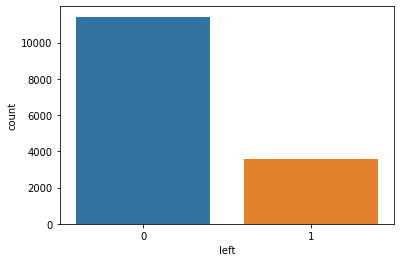

In [14]:
sns.countplot(df['left'])

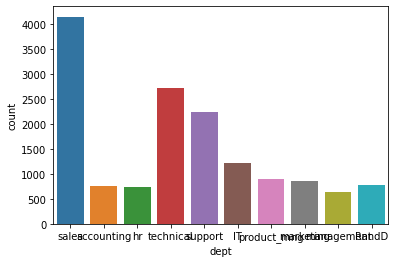

In [15]:
sns.countplot(df['dept'])

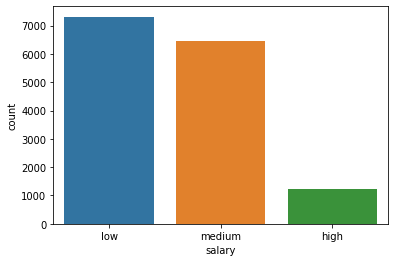

In [16]:
sns.countplot(df['salary'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [19]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [20]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [21]:
df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

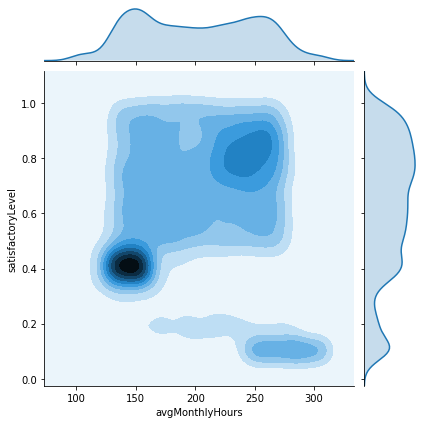

In [23]:
sns.jointplot(x=df['avgMonthlyHours'], y=df['satisfactoryLevel'], kind='kde')

In [25]:
df.groupby('left').mean()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [26]:
df.groupby('dept').mean()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
dept,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [27]:
df.groupby('salary').mean()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

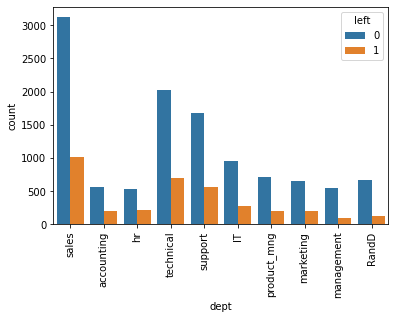

In [29]:
sns.countplot(df['dept'], hue=df['left'])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

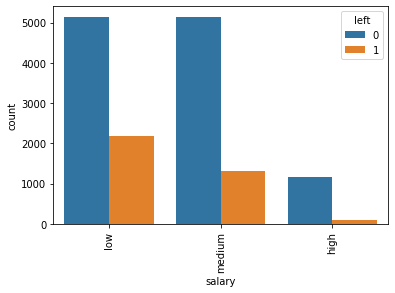

In [30]:
sns.countplot(df['salary'], hue=df['left'])
plt.xticks(rotation=90)

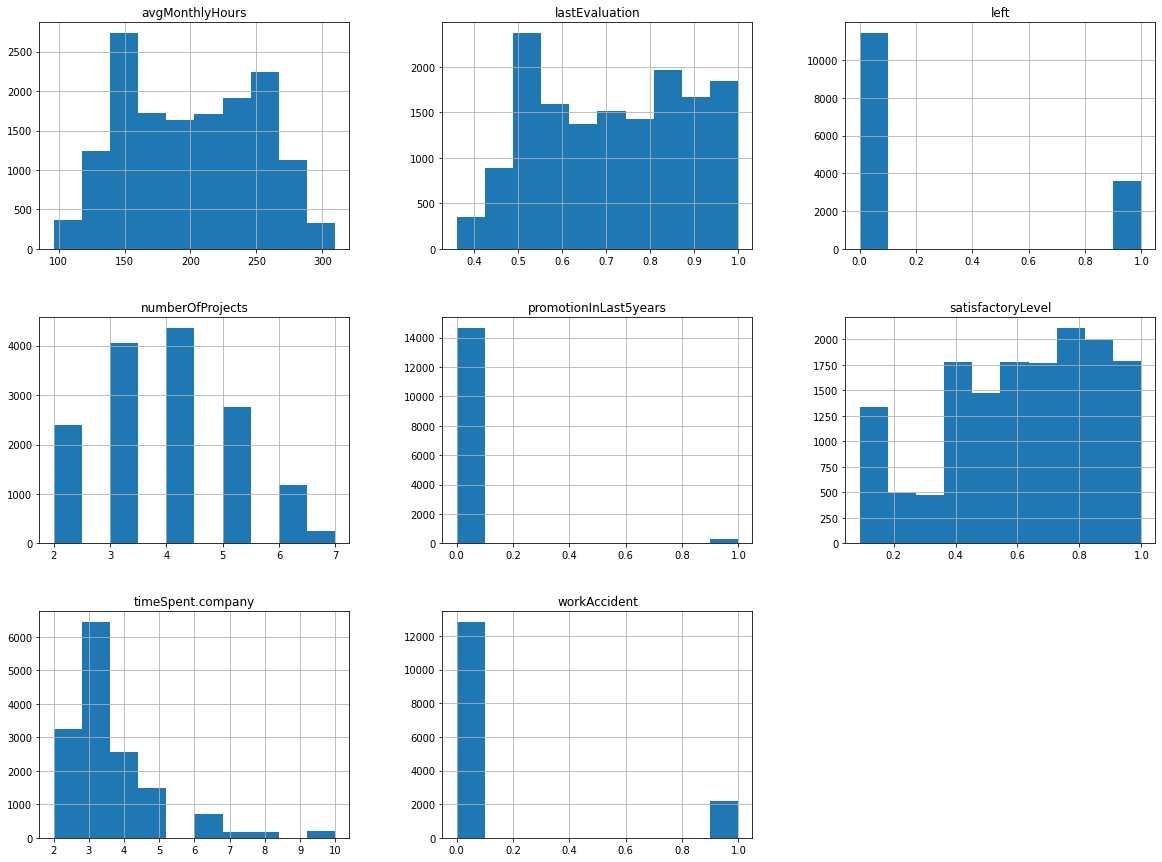

In [33]:
#Histogram of numeric variables
num_bins = 10

df.hist(bins=num_bins, figsize=(20,15))
plt.show()

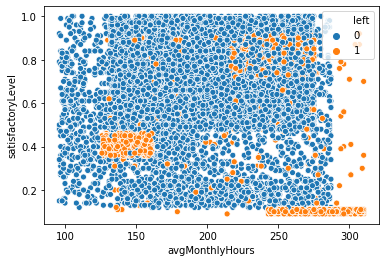

In [34]:
sns.scatterplot(x=df['avgMonthlyHours'], y=df['satisfactoryLevel'], hue='left', data=df)

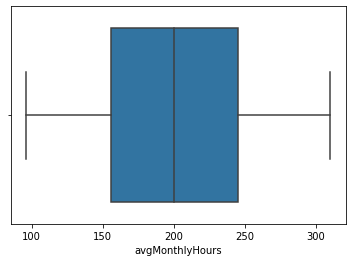

In [35]:
sns.boxplot(df['avgMonthlyHours'])

In [39]:
df.sample(5)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
10783,0.22,0.44,3,166,6,0,0,0,hr,3
6724,0.55,0.74,2,116,3,0,0,0,sales,3
6481,0.86,0.56,5,215,2,0,0,0,sales,3
13430,0.40,0.55,2,155,3,0,1,0,sales,3
7989,0.40,0.51,2,145,3,0,1,0,hr,3


## Feature Engineering

In [38]:
df['salary'] = df['salary'].map({'low':3,'medium':2,'high':1})

In [43]:
df.groupby('dept')['left'].mean().sort_values()

dept
management     0.144444
RandD          0.153748
product_mng    0.219512
IT             0.222494
marketing      0.236597
sales          0.244928
support        0.248991
technical      0.256250
accounting     0.265971
hr             0.290934
Name: left, dtype: float64

In [46]:
ordered_dept = df.groupby('dept')['left'].mean().sort_values().index

ordinal_dept = {k:i for i, k in enumerate(ordered_dept, 1)} 
ordinal_dept

{'IT': 4,
 'RandD': 2,
 'accounting': 9,
 'hr': 10,
 'management': 1,
 'marketing': 5,
 'product_mng': 3,
 'sales': 6,
 'support': 7,
 'technical': 8}

In [47]:
df['dept'] = df.dept.map(ordinal_dept)

In [48]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,6,3
1,0.80,0.86,5,262,6,0,1,0,6,2
2,0.11,0.88,7,272,4,0,1,0,6,2
3,0.37,0.52,2,159,3,0,1,0,6,3
4,0.41,0.50,2,153,3,0,1,0,6,3


## Model Building

In [100]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, cohen_kappa_score, f1_score

In [49]:
X = df.drop('left', axis=1)
y = df['left']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### 1. Random Forests

In [57]:
from sklearn.model_selection import cross_val_score, GridSearchCV

rf1 = RandomForestClassifier()
n_estimators = [200, 300, 500, 400, 100]
max_depth = [4,6,5,7,8]
min_samples_split = [6,8,9,7,5]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

gridF = GridSearchCV(rf1, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1, scoring='accuracy')
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  6.7min finished


In [58]:
# summarize results
print("Best: %f using %s" % (bestF.best_score_, bestF.best_params_))

Best: 0.977807 using {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 500}


In [121]:
rf_best = RandomForestClassifier(max_depth= 8, min_samples_split= 5, n_estimators= 500, min_samples_leaf=3, max_features='sqrt')

In [122]:
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))

[[3399    6]
 [  86 1009]]
Accuracy of our model is:  0.9795555555555555


In [123]:
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3405
           1       0.99      0.92      0.96      1095

    accuracy                           0.98      4500
   macro avg       0.98      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500

0.956398104265403


In [63]:
print(cohen_kappa_score(y_test, y_pred))

0.942469956532856


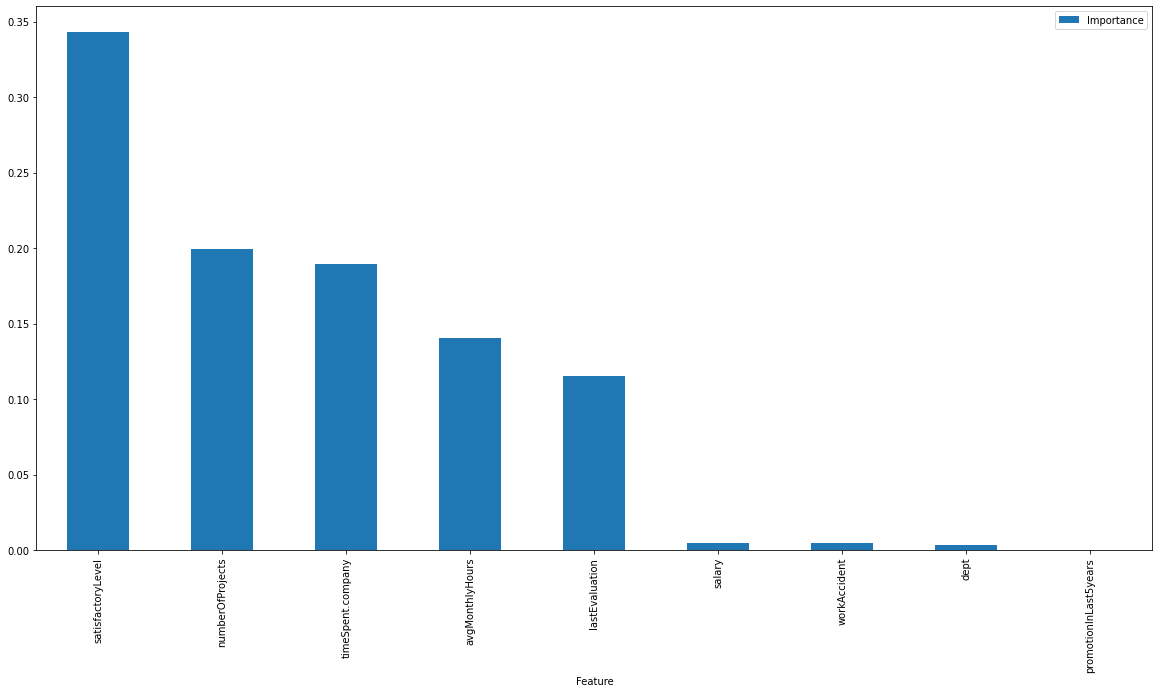

In [64]:
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Importance'] = rf_best.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

features.plot(kind='bar', figsize=(20, 10))

### 2. Support vector Classifier

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC 
# defining parameter range 
param_grid = {'C': [ 1, 10, 100], 
            'gamma': [ 0.1, 0.01, 0.001], 
            'kernel': ['rbf', 'poly']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=3, scoring='accuracy') 

# fitting the model for grid search 
grid.fit(X_train_sc, y_train) 

In [115]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [116]:
y_pred_svm = grid.predict(X_test_sc)

print(confusion_matrix(y_test, y_pred_svm))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred_svm))

[[3356   49]
 [  72 1023]]
Accuracy of our model is:  0.9731111111111111


In [117]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3405
           1       0.95      0.93      0.94      1095

    accuracy                           0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [118]:
print(cohen_kappa_score(y_test, y_pred_svm))

0.9264568830684701


In [120]:
print(f1_score(y_test, y_pred_svm))

0.9441624365482233


### 3. Decision Tree Classifier

In [109]:
clf = DecisionTreeClassifier(splitter='random', max_leaf_nodes=10, min_samples_leaf=5, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [110]:
y_pred = clf.predict(X_test)

In [74]:
print (confusion_matrix(y_test, y_pred))
print (accuracy_score(y_test, y_pred))

[[3302  103]
 [ 104  991]]
0.954


In [75]:
print(classification_report(y_test, y_pred))
print(cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3405
           1       0.91      0.91      0.91      1095

    accuracy                           0.95      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500

0.8750442677312386


In [111]:
print(f1_score(y_test, y_pred))

0.8123775949862907


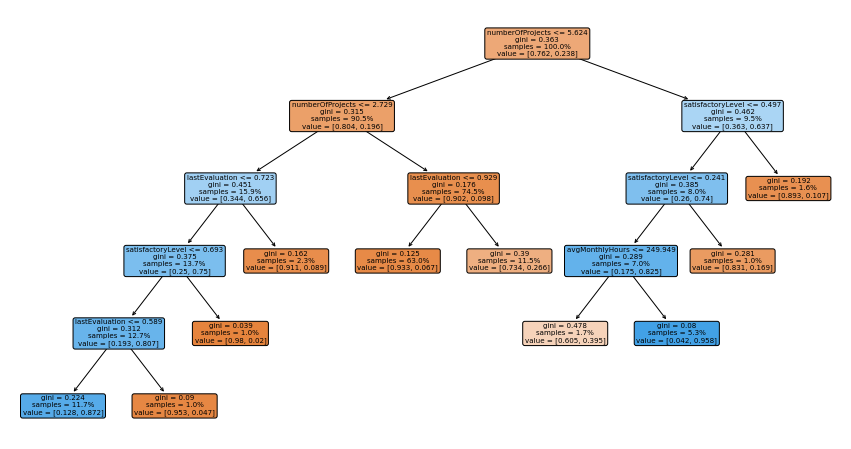

In [76]:
from sklearn import tree
cols = list(X.columns.values)
plt.figure(figsize=(15,8))
tree.plot_tree(clf.fit(X, y), feature_names=cols, filled=True, precision=3, proportion=True, rounded=True)
plt.show()

### 4. K- Nearest Neighbour Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
error_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_sc, y_train)
  pred_i = knn.predict(X_test_sc)
  error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'Error rate vs K')

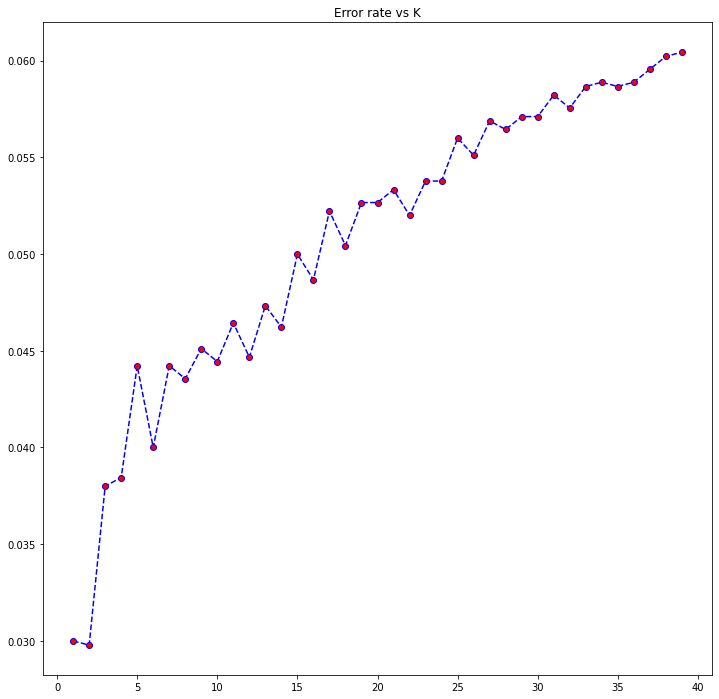

In [79]:
plt.figure(figsize=(12,12))

plt.plot(range(1,40), error_rate, color='b', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Error rate vs K')

In [108]:
knn_21 = KNeighborsClassifier(n_neighbors=6)
knn_21.fit(X_train_sc, y_train)
pred = knn_21.predict(X_test_sc)

confusion_matrix(y_test, pred)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))
print(f1_score(y_test, pred))

0.96
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3405
           1       0.92      0.92      0.92      1095

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500

0.9175824175824177


### 4. Logistic Regression

In [84]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = [ 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_sc, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.794551 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [106]:
best_model1 = LogisticRegression(C=100, solver='newton-cg', penalty = 'l2')
best_model1.fit(X_train_sc, y_train)
y_pred = best_model1.predict(X_test_sc)

In [107]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[3156  249]
 [ 706  389]]
Accuracy of our model is:  0.7877777777777778
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3405
           1       0.61      0.36      0.45      1095

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500

0.44893248701673394


Feature: 0, Score: -1.03231
Feature: 1, Score: 0.13109
Feature: 2, Score: -0.40998
Feature: 3, Score: 0.22554
Feature: 4, Score: 0.39284
Feature: 5, Score: -0.52470
Feature: 6, Score: -0.20059
Feature: 7, Score: 0.16092
Feature: 8, Score: 0.44687


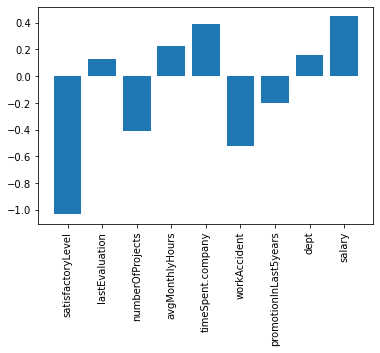

In [89]:
# get importance
importance = best_model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in X_train.columns], importance)
plt.xticks(rotation=90)
plt.show()


### 5. Naive Bayes

In [104]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(alpha=10)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [105]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[3405    0]
 [1095    0]]
Accuracy of our model is:  0.7566666666666667
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3405
           1       0.00      0.00      0.00      1095

    accuracy                           0.76      4500
   macro avg       0.38      0.50      0.43      4500
weighted avg       0.57      0.76      0.65      4500

0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. Ada Boost Classifier

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [102]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [103]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[3309   96]
 [  84 1011]]
Accuracy of our model is:  0.96
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3405
           1       0.91      0.92      0.92      1095

    accuracy                           0.96      4500
   macro avg       0.94      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500

0.9182561307901907


Out of all model we tested on our dataset, we have got Random Forest Classifier as our best model since it has the highest accuracy as well as F1 score. 

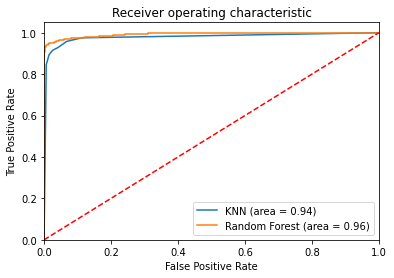

In [127]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#ROC for KNN
knn_roc_auc = roc_auc_score(y_test, knn_21.predict(X_test_sc))
fpr, tpr, thresholds = roc_curve(y_test, knn_21.predict_proba(X_test_sc)[:,1])

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, rf_best.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_best.predict_proba(X_test)[:,1])

#ROC Curve for Random Forest & KNN
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

### **Results and Observations**

1. The Random Forest is the best classfier for predicting employee attrition for our dataset. Some of the most important factors on which employee attrition depends are:


*   Satisfaction Level
*   No. of Projects
*   Tenure with organisation
*   Time since last evaluation
*   Last Evaluation
*   Salary






The Random Forest Model achieved an accuracy of 98% with a F1 score of 0.965.